<a href="https://colab.research.google.com/github/j764012/Prediction-of-quality-of-Wine/blob/main/Prediction_of_quality_of_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data preprocessing

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe()
# density 25% - 75% are 0.99, not much help for wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


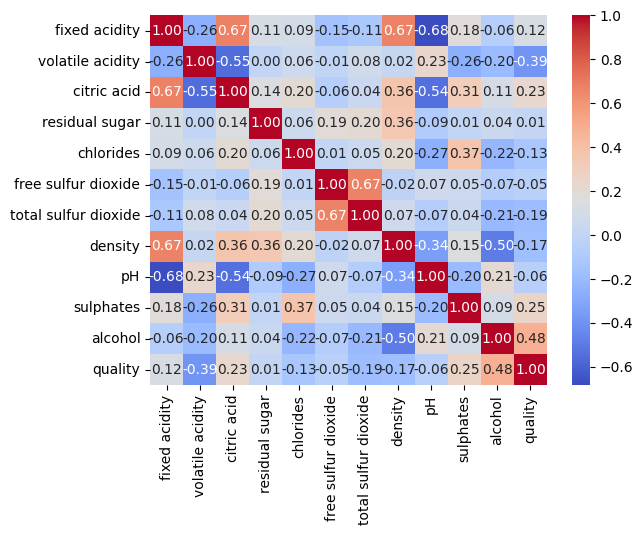

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f',  cmap='coolwarm')
plt.show()

In [7]:
df.drop('density', axis=1, inplace=True)

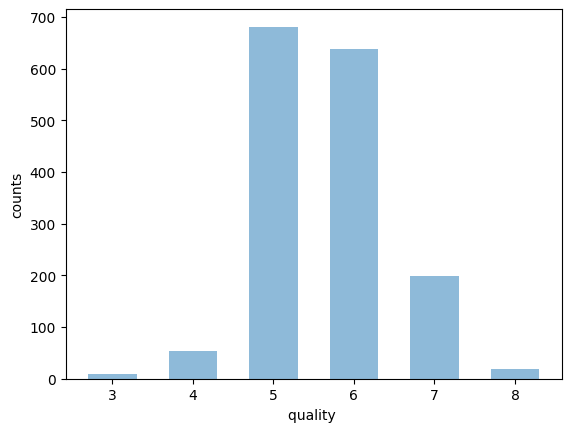

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['quality'], range=(3, 9), bins=6, alpha=0.5, align='left', rwidth=0.6)
plt.xlabel('quality ')
plt.ylabel('counts')
plt.show()

In [9]:
bins = (0, 2, 4 ,8, 10)
group = ['so bad', 'bad', 'good', 'so good']
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
result = pd.cut(data, bins=bins, labels=group)
print(result)

['so bad', 'so bad', 'bad', 'bad', 'good', 'good', 'good', 'good', 'so good', 'so good']
Categories (4, object): ['so bad' < 'bad' < 'good' < 'so good']


In [10]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad


In [11]:
df['quality'] = df['quality'].map({'bad':0, 'good':1})

In [12]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [13]:
# standard
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
std = StandardScaler()
feature_columns = df.columns.difference(["quality"])
df[feature_columns] = std.fit_transform(df[feature_columns])

# evaluate and compare model

In [14]:
from sklearn.model_selection import cross_val_score
def eval(clf, train_X, train_y):
  score = cross_val_score(clf, train_X, train_y, cv=5, scoring='accuracy').mean()
  print(f'{clf} accuracy : {score}')
  return score

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

X_train = df.drop('quality', axis = 1)
y_train = df['quality']



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
score1 = eval(rfc, X_train, y_train)

tree_clf = DecisionTreeClassifier()
score2 = eval(tree_clf, X_train, y_train)

svm_clf = SVC(random_state=42)
score3 = eval(svm_clf, X_train, y_train)

navie_clf = GaussianNB()
score4 = eval(navie_clf, X_train, y_train)

KNN_clf = KNeighborsClassifier()
score5 = eval(KNN_clf, X_train, y_train)

RandomForestClassifier(n_estimators=200) accuracy : 0.8755485893416928
DecisionTreeClassifier() accuracy : 0.8004917711598747
SVC(random_state=42) accuracy : 0.8724216300940439
GaussianNB() accuracy : 0.8130387931034482
KNeighborsClassifier() accuracy : 0.8499157523510972


In [16]:
accuracy = {
    'model': ['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'GaussianNB', 'KNeighborsClassifier'],
    'accuracy' : [score1, score2, score3, score4, score5]
}

accuracy_df = pd.DataFrame(accuracy)
print(accuracy_df)

                    model  accuracy
0  RandomForestClassifier  0.875549
1  DecisionTreeClassifier  0.800492
2                     SVC  0.872422
3              GaussianNB  0.813039
4    KNeighborsClassifier  0.849916


# pytorch

In [17]:
print(X_train.shape)
print(y_train.shape)

(1599, 10)
(1599,)


In [18]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

for train_index, test_index in split.split(X_train, y_train):
  train_X = X_train.iloc[train_index]
  train_y = y_train.iloc[train_index]
  test_X = X_train.iloc[test_index]
  test_y = y_train.iloc[test_index]

In [19]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# std = StandardScaler()
# train_X = std.fit_transform(train_X)
# train_y = std.fit_transform(train_y)
# test_X = std.fit_transform(test_X.values)
# test_y = std.fit_transform(test_y.values)

In [20]:
train_y.value_counts()

0    1105
1     174
Name: quality, dtype: int64

In [21]:
import tensorflow as tf
import numpy as np
train_y_1hot = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y_1hot = tf.keras.utils.to_categorical(test_y, num_classes=2)

In [22]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print(device)
else:
  device = torch.device('cpu')
  print(device)

cpu


In [23]:
X_tensor = torch.tensor(train_X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(train_y_1hot, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(test_X.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(test_y_1hot, dtype=torch.float32).to(device)

In [24]:
X_tensor.shape

torch.Size([1279, 10])

In [25]:
y_test_tensor.shape

torch.Size([320, 2])

In [26]:

import torch
import torch.nn as nn
import torch.nn.functional as F

class Linear(nn.Module):
  def __init__(self):
    super(Linear, self).__init__()
    self.Linear = nn.Sequential(
          nn.Linear(10, 100),
          nn.Linear(100, 200),
          nn.Linear(200, 2),
        )

  def forward(self, x):
    x = self.Linear(x)
    x = F.sigmoid(x)
    return x

model = Linear()
model.to(device)

Linear(
  (Linear): Sequential(
    (0): Linear(in_features=10, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=2, bias=True)
  )
)

In [27]:
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0)
epochs = 1000

batch_size = 16
batch_num = len(X_train)//batch_size

train_loss = []
test_loss = []
for epoch in range(epochs):
  for i in range(batch_num):
    start = i*batch_size
    end = start + batch_size


    X = X_tensor[start:end]
    y = y_tensor[start:end]


    preds = model(X)
    loss = loss_fn(preds, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  loss = loss_fn(model(X_tensor), y_tensor)
  train_loss.append(loss.item())
  if epoch % 5 == 0:
    print(f'epochs : {epoch}, loss : {loss}')
  loss = loss_fn(model(X_test_tensor), y_test_tensor)
  test_loss.append(loss.item())


epochs : 0, loss : 0.48548996448516846
epochs : 5, loss : 0.4301983118057251
epochs : 10, loss : 0.42632874846458435
epochs : 15, loss : 0.4249424636363983
epochs : 20, loss : 0.42420193552970886
epochs : 25, loss : 0.42365896701812744
epochs : 30, loss : 0.42311301827430725
epochs : 35, loss : 0.4226926863193512
epochs : 40, loss : 0.42238226532936096
epochs : 45, loss : 0.4221411347389221
epochs : 50, loss : 0.4219471514225006
epochs : 55, loss : 0.42178672552108765
epochs : 60, loss : 0.4216509163379669
epochs : 65, loss : 0.42153388261795044
epochs : 70, loss : 0.42143142223358154
epochs : 75, loss : 0.4213404655456543
epochs : 80, loss : 0.42125871777534485
epochs : 85, loss : 0.4211842715740204
epochs : 90, loss : 0.4211156666278839
epochs : 95, loss : 0.421051949262619
epochs : 100, loss : 0.4209921061992645
epochs : 105, loss : 0.4209355115890503
epochs : 110, loss : 0.4208813011646271
epochs : 115, loss : 0.4208289086818695
epochs : 120, loss : 0.4207773804664612
epochs : 125,

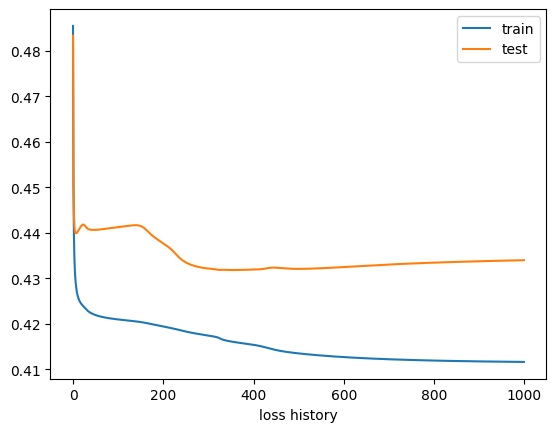

In [28]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.xlabel('loss history')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
preds = model(X_test_tensor)
preds = torch.max(preds.data, 1)[1]
target = torch.max(y_test_tensor, 1)[1]
correct = torch.sum(preds == target)
accuracy = 100 * correct / float(len(y_test_tensor))
print(accuracy)

tensor(87.1875)


In [30]:
from sklearn.metrics import classification_report
y_pred = model(X_test_tensor)
y_pred = np.where(y_pred.cpu() >= 0.5, 1, 0)
print(classification_report(y_test_tensor.cpu(), y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       277
           1       0.49      0.47      0.48        43

   micro avg       0.85      0.89      0.87       320
   macro avg       0.69      0.71      0.70       320
weighted avg       0.84      0.89      0.87       320
 samples avg       0.86      0.89      0.87       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
